# Histograms and Density Plots

In this notebook we will look at the [NYCFlights13 dataset](https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf), which contains information on over 300,000 planes departing NYC airports in 2013. We will focus on visualizing the distribution of arrival delays given in minutes. 

Adapted from :towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

In [23]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.dpi'] = 200

import seaborn as sns



import warnings
warnings.filterwarnings("ignore")

## Data Import 

In [24]:
flights = pd.read_csv('https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/formatted_flights.csv')
flights['arr_delay'].describe()

count    317113.000000
mean          1.297143
std          29.064401
min         -60.000000
25%         -17.000000
50%          -6.000000
75%          11.000000
max         120.000000
Name: arr_delay, dtype: float64

# Histogram of All Arrival Delays 

## Matplotlib

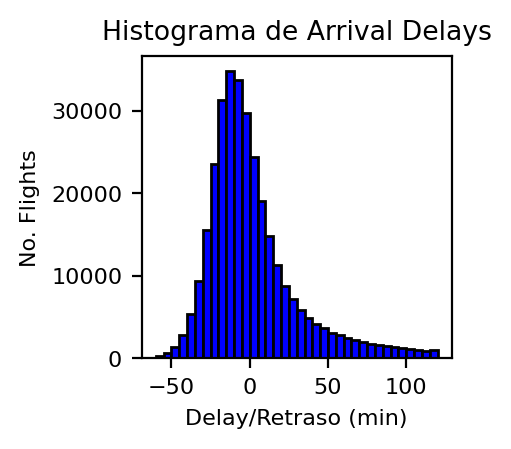

In [29]:
matplotlib.rcParams['figure.figsize'] = [2, 2]

# Make the histogram using matplotlib, bins must be integer

# vr min = -10 y máximo 160, el total es 180, el tamaño del bin es 5 180/5

plt.hist(flights['arr_delay'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# Configuramos la gráfica

plt.title('Histograma de Arrival Delays')
plt.xlabel('Delay/Retraso (min)'); plt.ylabel('No. Flights');

## Seaborn

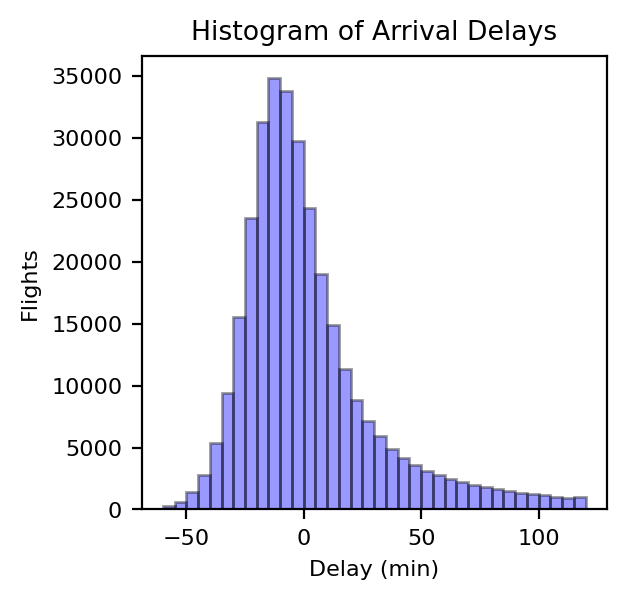

In [31]:

sns.distplot(flights['arr_delay'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)'); plt.ylabel('Flights');


## Histogram with Varying Binwidths

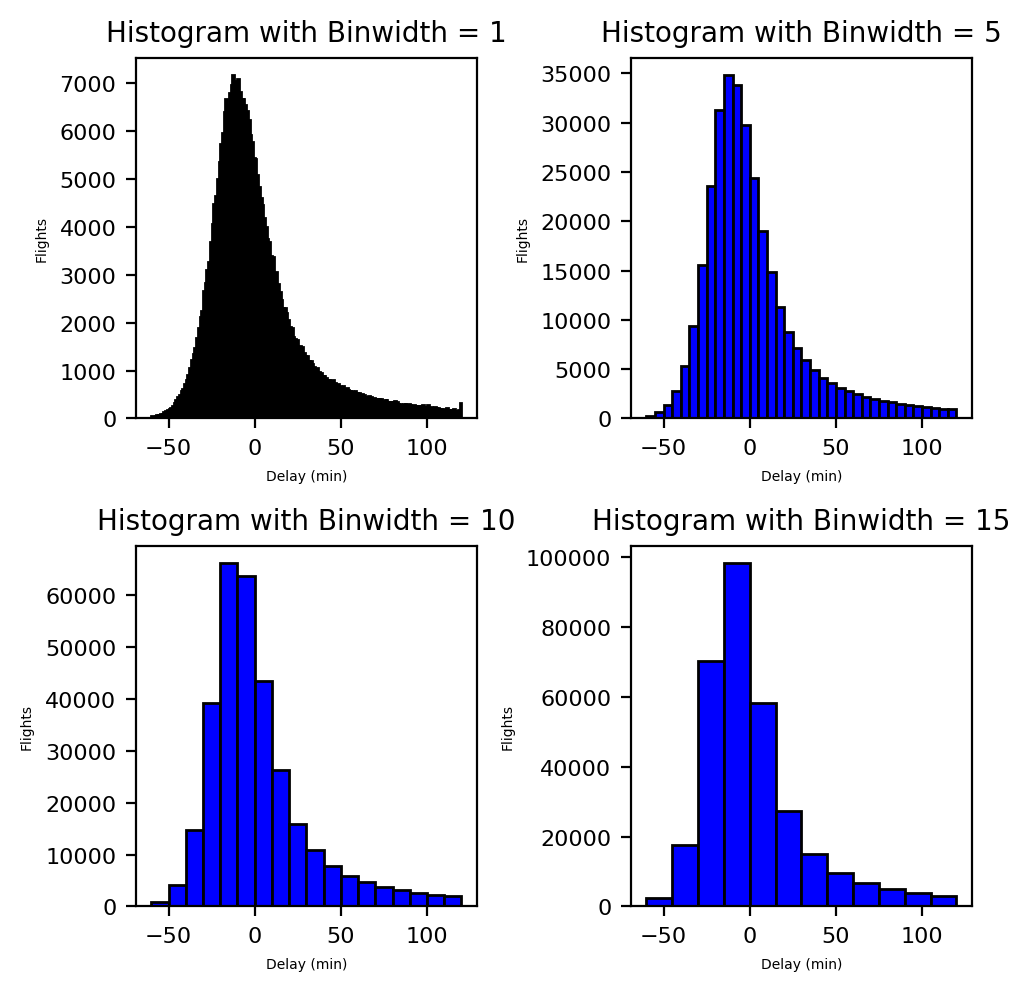

In [40]:
matplotlib.rcParams['figure.figsize'] = [5,5]

# Mostra 4 diferentes binwidths

for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(flights['arr_delay'], bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 10)
    ax.set_xlabel('Delay (min)', size = 5)
    ax.set_ylabel('Flights', size= 5)

plt.tight_layout()
plt.show()

# Donde fallan los histogramas: múltiples categorías

Los histogramas funcionan muy bien para mostrar una sola variable de una categoría (en este caso, la categoría eran todos los vuelos). Sin embargo, para mostrar varias categorías, un histograma no funciona bien porque los gráficos están oscurecidos.

In [35]:
# Extract top five airlines with most flights

carrier_flights = pd.Series(flights.groupby('name')['name'].count())
carrier_flights = carrier_flights.sort_values(ascending=False)
top_five = carrier_flights.index[:5]

# Subset to the top 5 airlines
top_five_flights = flights[flights['name'].isin(top_five)]

In [36]:
top_five_flights

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.
...,...,...,...
317108,336765,-17.0,JetBlue Airways
317109,336766,-20.0,JetBlue Airways
317110,336767,-16.0,JetBlue Airways
317111,336768,1.0,JetBlue Airways


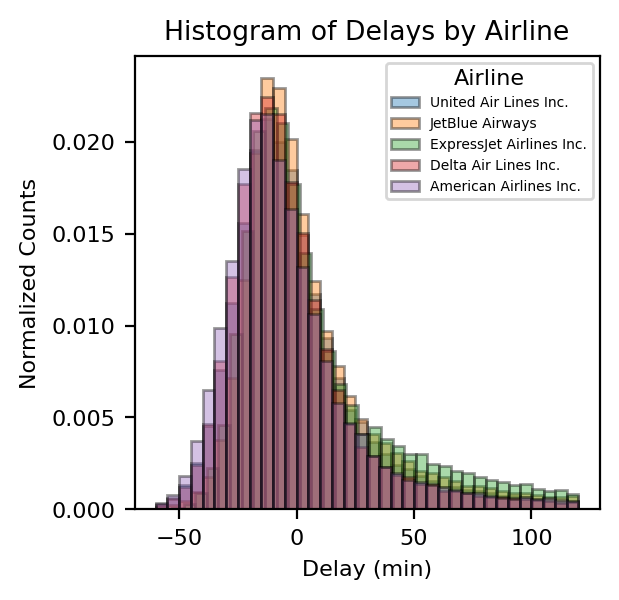

In [42]:
matplotlib.rcParams['figure.figsize'] = [3, 3]

# Iterate through each of the five airlines
for airline in top_five:
    # Subset to the airline
    subset = top_five_flights[top_five_flights['name'] == airline]
    # Make a histogram with the airline
    sns.distplot(subset['arr_delay'], bins = int(180/5), 
                 label = airline, hist = True, kde = False, 
                 norm_hist=True, 
                 hist_kws = {'edgecolor': 'black'})
    
plt.legend(prop={'size': 5}, title = 'Airline')
plt.title('Histogram of Delays by Airline'); plt.xlabel('Delay (min)'); plt.ylabel('Normalized Counts');

In [45]:
# Crear una lista para cada airline

x1 = list(flights[flights['name'] == 'United Air Lines Inc.']['arr_delay'])
x2 = list(flights[flights['name'] == 'JetBlue Airways']['arr_delay'])
x3 = list(flights[flights['name'] == 'ExpressJet Airlines Inc.']['arr_delay'])
x4 = list(flights[flights['name'] == 'Delta Air Lines Inc.']['arr_delay'])
x5 = list(flights[flights['name'] == 'American Airlines Inc.']['arr_delay'])

# Assign colors for each airline and the names

colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']

names = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

## Solution 1: Side-by-Side Histograms

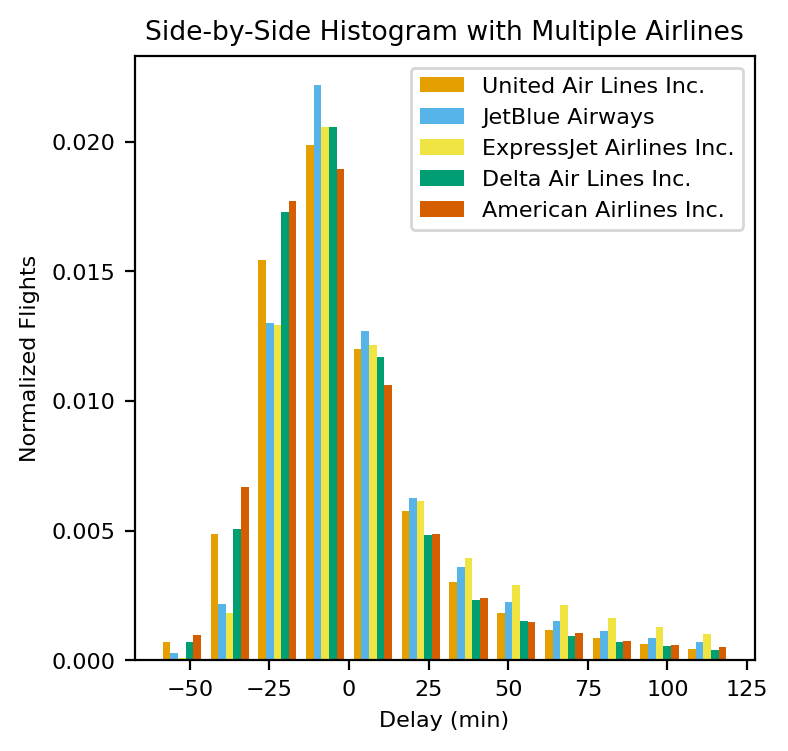

In [46]:
matplotlib.rcParams['figure.figsize'] = [4, 4]

# Make the histogram using a list of lists
#  Normalize and assign colors and names
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), density=True, color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Multiple Airlines');

## Solution 2: Stacked Histograms

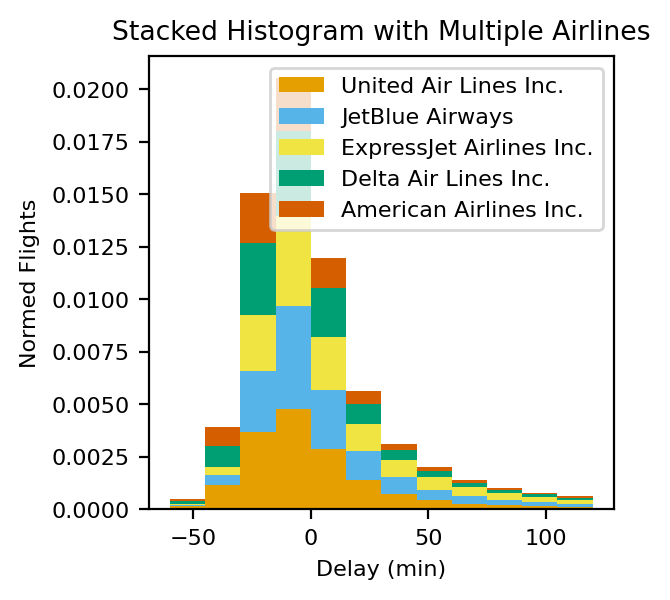

In [51]:
matplotlib.rcParams['figure.figsize'] = [3, 3]

plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), density=True, stacked=True,
         color = colors, label=names)

plt.legend(); plt.xlabel('Delay (min)'); plt.ylabel('Normed Flights');
plt.title('Stacked Histogram with Multiple Airlines');

# Solución 3: Gráficos de densidad

Un gráfico de densidad utiliza un núcleo (de forma predeterminada, un gaussiano) en cada punto de datos para crear una distribución y luego suma la distribución en cada ubicación para crear una única distribución.


Esto produce una versión suavizada de un histograma donde el eje y está en densidad. Esta densidad se puede considerar como una probabilidad de que el valor de los datos corresponda al valor en el eje x, pero esto puede crear problemas porque la densidad puede ser mayor que uno. Por lo general, solo lo considero como _densidad_, un valor que se usa solo con fines de comparación.

Más información en:
https://scikit-learn.org/stable/modules/density.html

## Density Plot of All Delays Using Seaborn

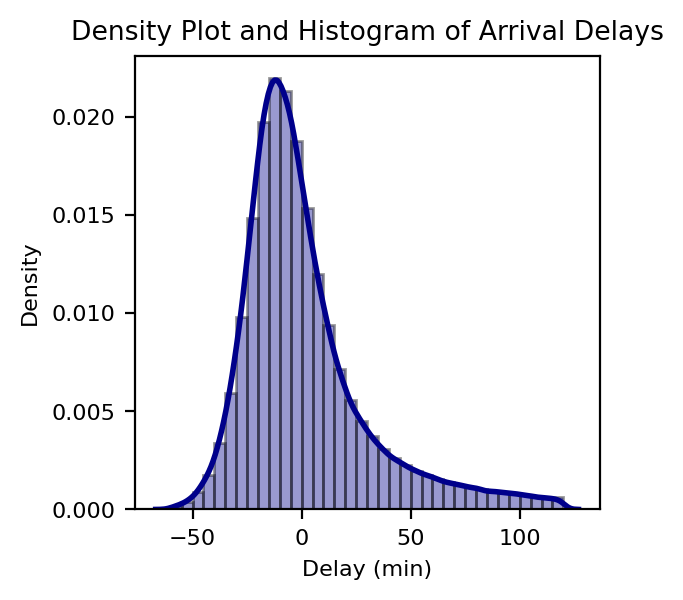

In [52]:
matplotlib.rcParams['figure.figsize'] = [3, 3]

sns.distplot(flights['arr_delay'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});

plt.title('Density Plot and Histogram of Arrival Delays'); 
plt.xlabel('Delay (min)'); plt.ylabel('Density');

# Density Plot with Varying Bandwidths

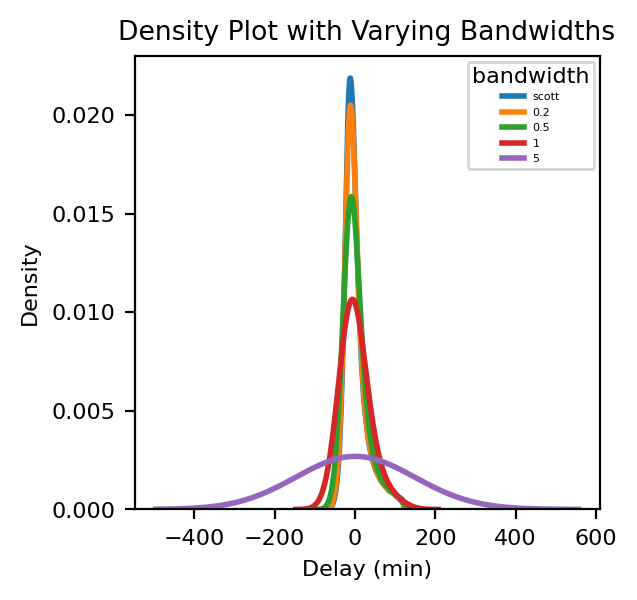

In [53]:
matplotlib.rcParams['figure.figsize'] = [3, 3]

for bandwidth in ['scott', 0.2, 0.5, 1, 5]:
    sns.distplot(flights['arr_delay'], hist = False, kde = True, 
                 kde_kws={'bw': bandwidth, 'linewidth': 2},
                 label = bandwidth)
    
plt.legend(prop={'size': 4}, title = 'bandwidth')
plt.title('Density Plot with Varying Bandwidths'); 
plt.xlabel('Delay (min)'); plt.ylabel('Density');

## Different Kernels for the Density Plot

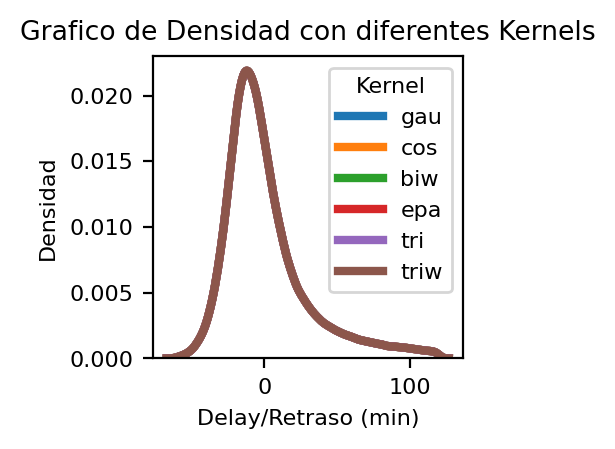

In [57]:
matplotlib.rcParams['figure.figsize'] = [2, 2]

for kernel in ['gau', 'cos', 'biw', 'epa', 'tri', 'triw']:
    sns.distplot(flights['arr_delay'], hist = False, kde = True, 
                 kde_kws={'kernel': kernel, 'linewidth': 3},
                 label = kernel)
    
plt.legend(prop={'size': 8}, title = 'Kernel')
plt.title('Grafico de Densidad con diferentes Kernels'); 
plt.xlabel('Delay/Retraso (min)'); plt.ylabel('Densidad');

# Density Plot of Delays of Top Five

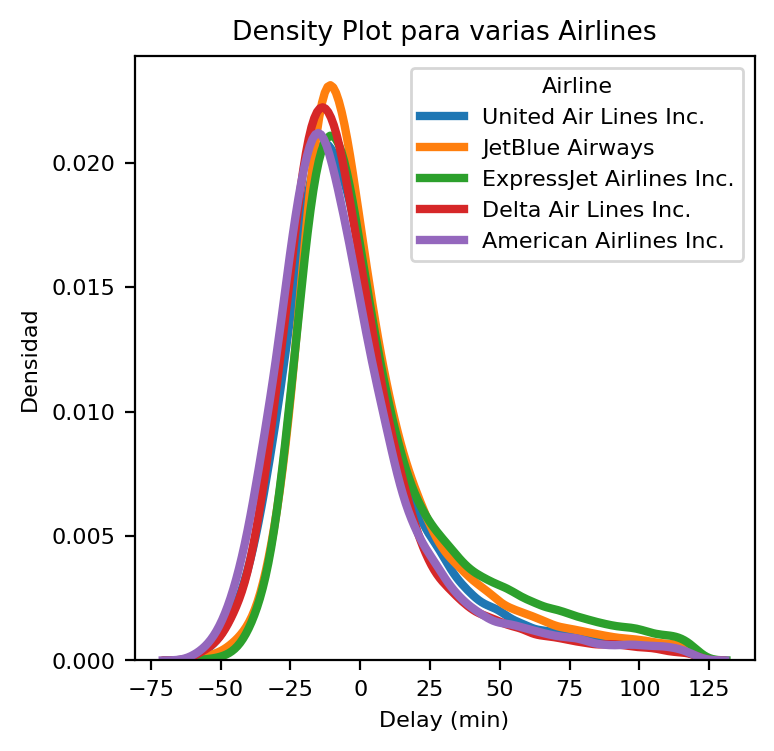

In [62]:
matplotlib.rcParams['figure.figsize'] = [4, 4]

# List of five airlines to plot
airlines = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

# Iterate through the top five airlines
for airline in airlines:
    # Subset to the airline
    subset = flights[flights['name'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
plt.legend(prop={'size': 8}, title = 'Airline')
plt.title('Density Plot para varias Airlines'); 
plt.xlabel('Delay (min)')
plt.ylabel('Densidad');

## Shaded Density Plot

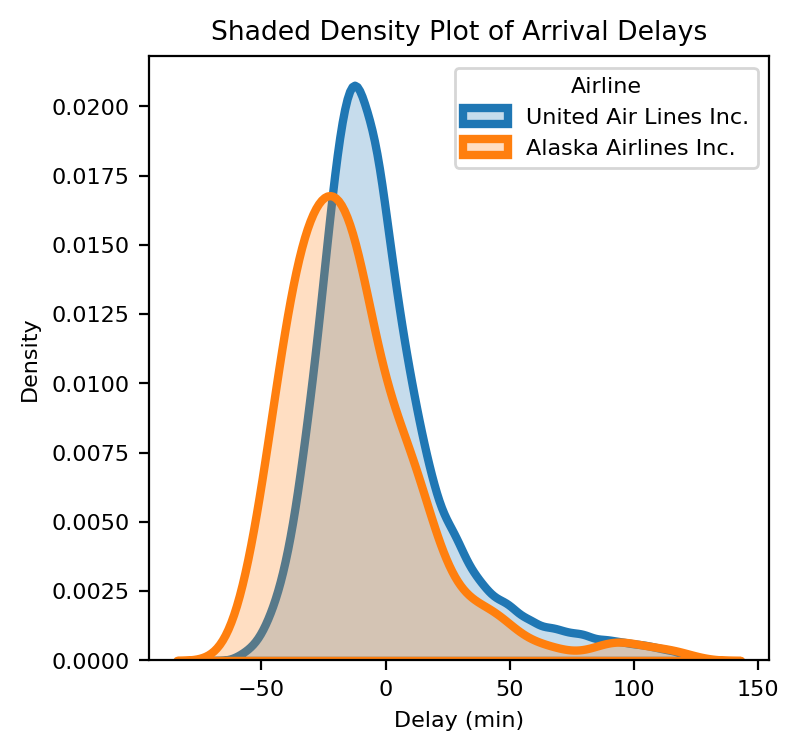

In [63]:
matplotlib.rcParams['figure.figsize'] = [4, 4]

for airline in ['United Air Lines Inc.', 'Alaska Airlines Inc.']:
    subset = flights[flights['name'] == airline]
    
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = airline)
    
plt.legend(prop={'size': 8}, title = 'Airline')
plt.title('Shaded Density Plot of Arrival Delays'); 
plt.xlabel('Delay (min)'); plt.ylabel('Density');

## Density with Rug Plot

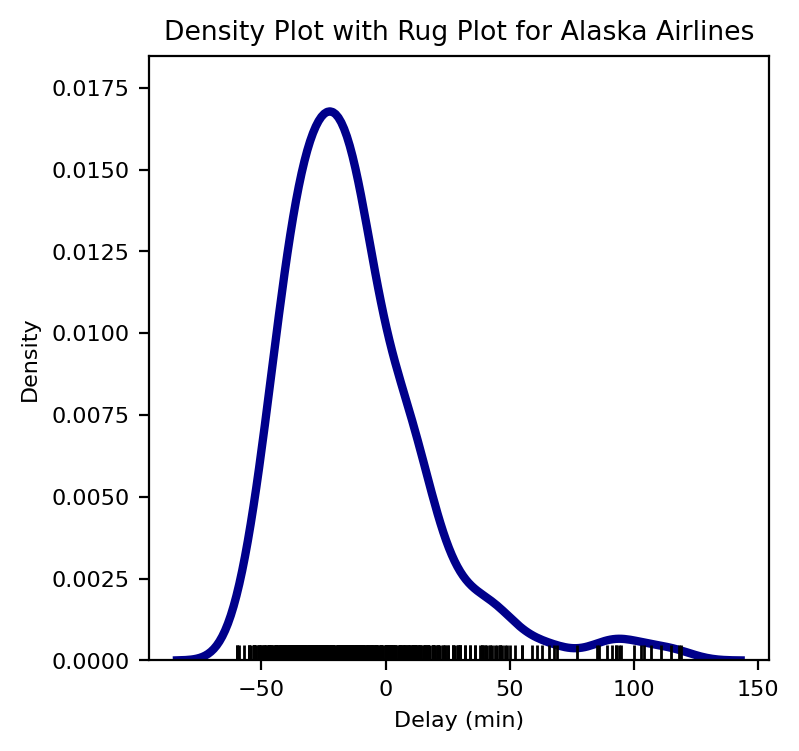

In [64]:
matplotlib.rcParams['figure.figsize'] = [4, 4]

# Subset to Alaska Airlines
subset = flights[flights['name'] == 'Alaska Airlines Inc.']

# Density Plot with Rug Plot
sns.distplot(subset['arr_delay'], hist = False, kde = True, rug = True,
             color = 'darkblue', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})

# Plot formatting
plt.title('Density Plot with Rug Plot for Alaska Airlines');
plt.xlabel('Delay (min)'); plt.ylabel('Density');

# Ejercicio

Aplique un grafico de densidad para una variable de su dataset